# **Programming for data**   Assessment 2

In [ ]:
from google.colab import drive; drive.mount('/content/drive')

In [4]:
import pandas as pd
data1=pd.read_csv("/content/drive/MyDrive/assessment2/F1 data/circuits.csv")
data1

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,-7,http://en.wikipedia.org/wiki/Baku_City_Circuit
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam,21.01660,105.76600,9,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit


## **1.Make a map of the world with all the tracks marked on**

In [5]:
pip install folium

In [6]:
import folium
import pandas as pd


df = pd.DataFrame(data1)

# Create map
map_center = [df['lat'].mean(), df['lng'].mean()]  # Use the average coordinates of the track as the centre of the map
mymap = folium.Map(location=map_center, zoom_start=4)

# Adding markers to the map
for index, row in df.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['circuitRef']).add_to(mymap)

# Show map
mymap.save('f1_circuits_map.html')





I've tried a number of ways to display the html file directly in colab's notebook, so the following code has been put on hold for a while, unable to be resolved.


Here are the two solutions I chose

In [7]:
from google.colab import files

# Select the HTML file to upload
uploaded = files.upload()



In [8]:
from IPython.display import HTML

# Assuming the HTML file is saved in the current working directory
html_file_path = '/content/f1_circuits_map.html'

# Displaying file contents using HTML classes
HTML(open(html_file_path).read())

## **2.Create a chart comparing the current drivers' place per race**

**left join**

In [9]:
import pandas as pd
driver_id_df = pd.read_csv("/content/drive/MyDrive/assessment2/F1 data/drivers.csv")
driver_score_df = pd.read_csv("/content/drive/MyDrive/assessment2/F1 data/driver_standings.csv")

# Results of the first left join, the connection to the rider ID table and the first join
merged_df = pd.merge(driver_score_df, driver_id_df, on='driverId', how='left', suffixes=('', '_driver_id'))

# Second left connection, joining the results of the first connection and the rider ID table
final_merged_df = pd.merge(merged_df, driver_id_df, left_on='driverId', right_on='driverId', how='left', suffixes=('_score', '_driver_id'))

# Show final results
print(final_merged_df)


       driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3   
3                      4      18         4     5.0         4            4   
4                      5      18         5     4.0         5            5   
...                  ...     ...       ...     ...       ...          ...   
33201              70567    1064       842    66.0         8            8   
33202              70568    1064       849     7.0        16           16   
33203              70569    1064         4    46.0        10           10   
33204              70570    1064       853     0.0        20           20   
33205              70571    1064         9     0.0        21           21   

       wins driverRef_score number_score code_score  ... nationality_score 

In [10]:
# Install matplotlib
pip install pandas matplotlib

In [11]:
# Install plotly
pip install plotly


**Below is a chart comparing the current drivers' place per race**

In [13]:

'''.import pandas as pd
import matplotlib.pyplot as plt

# 假设你的数据集文件名为 final_merged_df.csv
#file_path = "final_merged_df.csv"

# 读取数据集
#df = pd.read_csv(file_path)

# 筛选出车手号码不为\N的数据
filtered_df = final_merged_df[final_merged_df['number_driver_id']!= '\\N']

# 按比赛场次和车手号码进行分组，并计算每组的平均排名
grouped_df = filtered_df.groupby(['raceId', 'driverRef_score']).mean()['position'].reset_index()

# 将数据集按照比赛场次进行排序
grouped_df.sort_values(by='raceId', inplace=True)

# 绘制折线对比图
plt.figure(figsize=(40, 20))
for driver in grouped_df['driverRef_score'].unique():
    driver_data = grouped_df[grouped_df['driverRef_score'] == driver]
    plt.plot(driver_data['raceId'], driver_data['position'], label=driver)

plt.xlabel('比赛场次')
plt.ylabel('排名')
plt.title('车手排名折线对比图')
plt.legend(loc='upper right')
plt.show()
'''



import pandas as pd
import plotly.express as px


# Filtering out data with rider numbers other than "\N".
filtered_df = final_merged_df[final_merged_df['number_score'] != '\\N']

# Selection of required columns
selected_df = filtered_df[['driverRef_score', 'raceId', 'position']]

# Sorting by race and driver's name
sorted_df = selected_df.sort_values(by=['raceId', 'driverRef_score'])

# Using Plotly Express to create scatterplots
fig = px.scatter(sorted_df, x='raceId', y='position', color='driverRef_score',
                 labels={'position': 'Position', 'raceId': 'Race ID'},
                 title='Driver Positions Over Races',
                 template='plotly_dark')

# Display of charts and graphs
fig.show()


## **3.Pie chart of rider share by country**

In [14]:
#Drawing as an HTML pie chart

import pandas as pd
import matplotlib.pyplot as plt


'''# 假设你的数据集是一个包含driverId和nationality列的DataFrame
# 示例数据（请替换为你自己的数据）

df = pd.DataFrame(driver_id_df)

# 计算每个国家的车手数量
nationality_counts = df['nationality'].value_counts()

# 创建一个新的DataFrame以便绘制饼图
df_pie = pd.DataFrame({'Nationality': nationality_counts.index, 'Count': nationality_counts.values})

# 绘制饼图
fig, ax = plt.subplots(figsize=(80, 80))
ax.pie(df_pie['Count'], labels=df_pie['Nationality'], autopct='%1.1f%%', startangle=900)
ax.axis('equal')  # 使饼图比例相等

# 使用mpld3将图表嵌入到HTML中
html_output = mpld3.fig_to_html(fig)

# 保存HTML文件
with open('nationality_pie_chart.html', 'w') as html_file:
    html_file.write(html_output)

# 显示图表
plt.show()'''

#Since the data in regular pie charts are stacked together, it's easy to make interactive pie charts to view the data.
import pandas as pd
import plotly.express as px


df = pd.DataFrame(driver_id_df)

# Calculate the number of riders per country
nationality_counts = df['nationality'].value_counts()

# Create a new DataFrame in order to plot the pie chart.
df_pie = pd.DataFrame({'Nationality': nationality_counts.index, 'Count': nationality_counts.values})

# Creating Interactive Pie Charts with plotly.express
fig = px.pie(df_pie, names='Nationality', values='Count', title='Nationality Distribution')

# Creating Interactive Pie Charts with plotly.express
fig.show()


## **4.Table of Driver's Historical Score Totals**

In [15]:
import pandas as pd

# Calculate the total historical score for each rider
driver_total_points = final_merged_df.groupby('driverId')['points'].sum().reset_index()

# Combining rider totals and other information
driver_history = pd.merge(driver_total_points, driver_id_df, on='driverId', how='left')

# Displaying a table of a rider's historical totals
print(driver_history)

     driverId   points          driverRef number code  forename     surname  \
0           1  40351.0           hamilton     44  HAM     Lewis    Hamilton   
1           2   2830.0           heidfeld     \N  HEI      Nick    Heidfeld   
2           3  16910.0            rosberg      6  ROS      Nico     Rosberg   
3           4  19231.0             alonso     14  ALO  Fernando      Alonso   
4           5    953.0         kovalainen     \N  KOV    Heikki  Kovalainen   
..        ...      ...                ...    ...  ...       ...         ...   
841       850      0.0  pietro_fittipaldi     51  FIT    Pietro  Fittipaldi   
842       851      0.0             aitken     89  AIT      Jack      Aitken   
843       852    108.0            tsunoda     22  TSU      Yuki     Tsunoda   
844       853      0.0            mazepin      9  MAZ    Nikita     Mazepin   
845       854      0.0    mick_schumacher     47  MSC      Mick  Schumacher   

            dob nationality                        

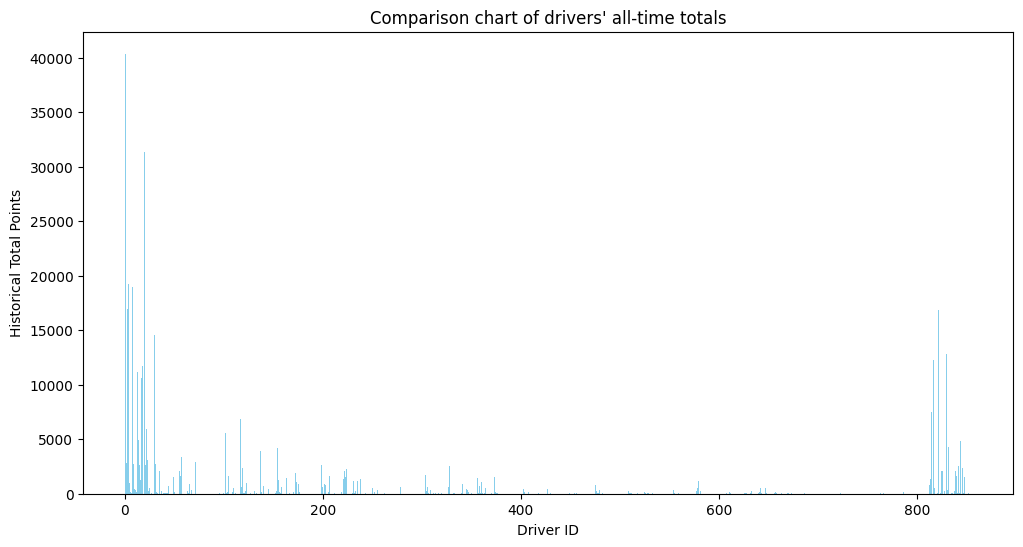

In [25]:
# Plotting comparisons
plt.figure(figsize=(12, 6))
plt.bar(driver_history['driverId'], driver_history['points'], color='skyblue')

# Add title and tags
plt.title("Comparison chart of drivers' all-time totals")
plt.xlabel('Driver ID')
plt.ylabel('Historical Total Points')

# Display Graphics
plt.show()

In [29]:
#Since the above graph is not visual enough and it is impossible to know the exact scores as well as the people, a new graph was created using plotly
import pandas as pd
import plotly.express as px


# Ranked in descending order of scores
driver_history_sorted = driver_history.sort_values(by='points', ascending=False)

# Creating Interactive Bar Charts with Plotly Express
fig = px.bar(driver_history_sorted, x='surname', y='points', title="Driver's All-Time Score",
             labels={'points': 'total score', 'surname': 'Rider code'},
             color='points', color_continuous_scale='Viridis')

# Display Graphics
fig.show()


## **5.Fastest driver per race stop**

In [21]:
import pandas as pd

# In merge, 'raceId' and 'driverId' are the keywords for the connection, and how='left' means left connection.
pit_stops_df = pd.read_csv("/content/drive/MyDrive/assessment2/F1 data/pit_stops.csv")
merged_df = pd.merge(final_merged_df, pit_stops_df, on=['raceId', 'driverId'], how='left')

# Displaying the merged table
print(merged_df)


       driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3   
3                      4      18         4     5.0         4            4   
4                      5      18         5     4.0         5            5   
...                  ...     ...       ...     ...       ...          ...   
37577              70567    1064       842    66.0         8            8   
37578              70568    1064       849     7.0        16           16   
37579              70569    1064         4    46.0        10           10   
37580              70570    1064       853     0.0        20           20   
37581              70571    1064         9     0.0        21           21   

       wins driverRef_score number_score code_score  ... forename_driver_id

In [28]:
import pandas as pd
import plotly.express as px

# Retain only rows with stopping times
filtered_df = merged_df.dropna(subset=['duration'])

# Sorted by number of games and stopping times
sorted_df = filtered_df.sort_values(by=['raceId', 'duration'])

# Find the driver with the shortest stops per race
min_duration_df = sorted_df.groupby('raceId').first().reset_index()

# Plotting Interactive Charts with Plotly
fig = px.bar(min_duration_df, x='raceId', y='duration', color='driverId',
             title='最短停站时间的车手', labels={'duration': '停站时间'})

# Show charts
fig.show()